In [169]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

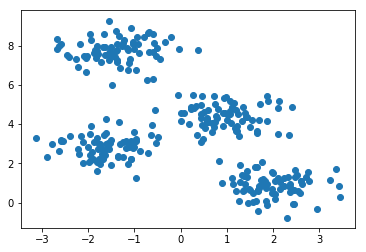

In [170]:
# Generating dummy data
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## K-Means Algorithm

In [180]:
def K_means(data, k, max_it = 500):
    
    # Initialise
        # Choose k data points as the initial centroids
    num_data = len(data)
    centroid_idxs = np.random.choice(range(num_data), k, replace = False)
    centroids = data[centroid_idxs]
    cluster_label = np.zeros(num_data)
    old_centroids = np.zeros(np.shape(centroids))
    iteration = 0
    
    
    
    while (iteration < max_it) and (centroids != old_centroids).any(): 

        # Keeping old centroids to check whether the centroids are changing or not
        old_centroids = np.copy(centroids)
        iteration +=1 
        
        
        # Allocate each datapoint to a cluster
        for i, x in enumerate(data): 
            # Find the distances to each centroid
            distances = np.zeros(k)
            for c, cent in enumerate(centroids):
                distances[c] = np.linalg.norm(x-cent)
            # Allocate to nearest centroid
            cluster_label[i] = np.argmin(distances)

        # Update Centroids
        for label in range(k):
            data_cluster = data[cluster_label == label]
            
            centroids[label] = np.mean(data_cluster, axis = 0) 
    
    return centroids, cluster_label

## Davies-Bouldin Index

The Davies-Bouldin Index effectively finds how well *clumped* each cluster is relative to all the other clusters and the finds the worst case comparison for each. How *clumped* a cluster is compared to another cluster can calculated through finding the average size/radius of each cluster and the intercluster distances. 

In [181]:
def scatterness(cluster_data, centroid, p = 2):
    
    sum_of_dist = 0
    for x in cluster_data:
        if p % 2 == 0: # if p is even
            sum_of_dist += (x - centroid)**p
        else: 
            sum_of_dist += np.abs(x - centroid)**p 
    avg = sum_of_dist/len(cluster_data)
    scatterness = avg**(1/p)
    return scatterness

def cluster_seperation(centroid_1, centroid_2):
    return np.linalg.norm(centroid_1 - centroid_2)
    


In [182]:
def davies_bouldin_index(data, cluster_labels, centroids):
    k = len(centroids)
    D = np.zeros(k)
    
    for i in range(k):
        cluster_i = data[cluster_labels == i]
        centroid_i = centroids[i]
        scatterness_i = scatterness(cluster_i, centroid_i)

        R = np.zeros(k)
        for j in range(k):
            if i != j:
                cluster_j = data[cluster_labels == j]
                centroid_j = centroids[j]
                
                scatterness_j = scatterness(cluster_j, centroid_j)
                
                seperation = cluster_seperation(centroid_i, centroid_j)
                
                # R ~ how poorly the clusters are seperated
                R = (scatterness_i + scatterness_j) / seperation
        
        # Collating the worst case comparisons for each cluster
        D[i] = np.max(R)
        
    DB = np.mean(D)
    return DB

## Using Davies-Bouldin Index to help find the optimal number of clusters

In [191]:
# Setting the upper limit to the number of clusters
max_k = 7

# Will run the evaluation multiple times to account for the random seeding of the centroids
repeats = 6
k_vals = range(2, max_k)
DB_val = np.zeros((repeats, len(k_vals)))

# Finding the average DB-index over various iterations for each number of clusters
for r in range(repeats):
    for i, k in enumerate(k_vals):
        centroids, labels = K_means(X, k)
        DB_val[r, i] = davies_bouldin_index(X, labels, centroids)
DB_val = np.mean(DB_val, axis = 0)

# Choosing the optimal number of clusters
best_k = np.argmin(DB_val)    

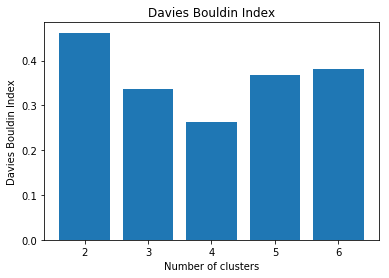

In [194]:
plt.bar(k_vals, DB_val)
plt.title("Davies Bouldin Index")
plt.xlabel("Number of clusters")
plt.ylabel("Davies Bouldin Index")
plt.show()

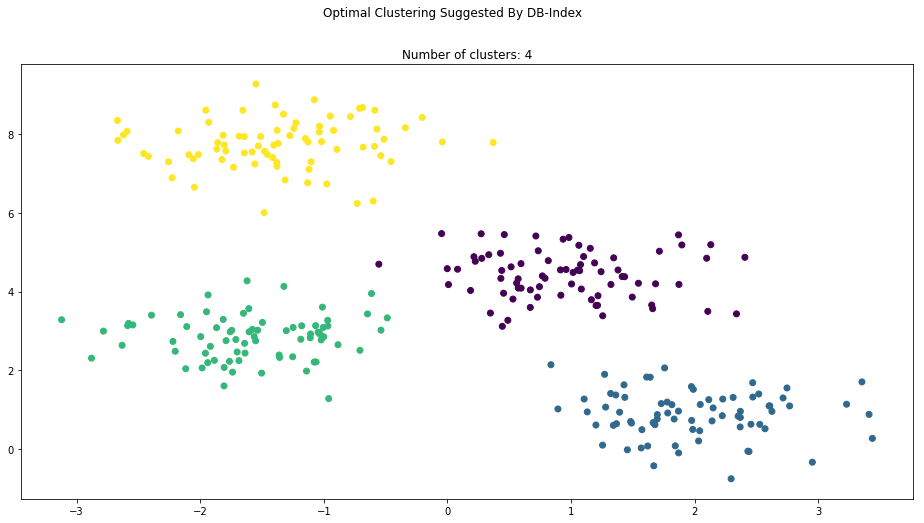

In [198]:
best_k_val = k_vals[np.argmin(DB_val)]
centroids, labels = K_means(X, best_k_val)

plt.figure(figsize = (16, 8))
plt.scatter(X[:, 0], X[:, 1], c = labels)
plt.suptitle("Optimal Clustering Suggested By DB-Index")
plt.title("Number of clusters: {}".format(best_k_val))
plt.show()